# This notebook is based on Datascience school's Deep Learning Online course assignment.

The original assignment instructed the students to transposes input arrays, which was very counterintuitive to me, so I changed the array orientations.

# 딥러닝 온라인 심화반 <Level 6>에 오신 것을 환영합니다!

<Level 6>의 주제는 <U>Multi Layer Perceptron(MLP, 다층 퍼셉트론)</U>입니다. 우리는 퍼셉트론이 가지고 있는 가장 큰 문제들 중 하나인 XOR 문제에 대해 알아보고, MLP의 개념과 예측 및 학습 방법에 대해 배웠습니다. 마지막으로 우편번호 손글씨 이미지(MNIST)를 인식하는 알고리즘을 업그레이드 해보겠습니다.

## Prerequisites

이전과 같이 MNIST 문제를 풀기 위한 환경 설정을 해줍니다. MNIST 필기체 데이터셋이 내장되어 있는 **keras** 라이브러리가 설치되어 있는지 확인해주세요. 또한 **keras**는 **tensorflow** 상에서 구현된 라이브러리이므로(고수준 API라고 함) **tensorflow**가 우선적으로 설치되어 있어야 합니다.

In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore') # 경고 메시지를 숨길 수 있습니다.

In [0]:
# 파이썬을 아나콘다로 설치한 경우, 아래 명령어 대신 아나콘다 네비게이터(Anaconda Navigator)를 실행한 뒤
# 좌측의 환경(Environment) 탭에서 설치할 수 있습니다.
# !pip install tensorflow
# !pip install keras

## MNIST Dataset

이번 과제는 [MNIST 필기체 데이터셋](http://yann.lecun.com/exdb/mnist/)을 활용하여 필기체 이미지를 인식하는 이미지 인식 알고리즘을 **Multi Layer Perceptron**로 작성합니다. 복습 차원에서 퍼셉트론 또는 Single Layer Neural Network을 이용해 MNIST 문제를 해결한 다음, Multi Layer Perceptron으로 이것을 개선해보겠습니다.

**1. MNIST 데이터셋 구성**
> 가로 28px, 세로 28px의 필기체 이미지가 주어지며, 필기체는 숫자 0부터 9까지 총 10개의 Label로 구성되어 있습니다. 이미지는 컬러가 없는 흑백 데이터이며, 한 픽셀의 값은 0 ~ 255입니다. (0일수록 어둡고, 255일수록 밝습니다.)

**2. Train, Test Set**
> 데이터는 60,000개의 Train 데이터와 10,000개의 Test 데이터가 주어지는데, Train 데이터로 Multi-layer Neural Network를 학습한 뒤 Test 데이터로 정확도(accuracy)를 측정합니다. 각 변수의 세부 정보는 다음과 같습니다.

   * **X_train**: **Train 데이터의 Feature**입니다. 가로 28px, 세로 28px, 총 60,000개의 데이터로 구성되어 있습니다. 픽셀 하나의 값은 0 ~ 255입니다.
   * **y_train**: **Train 데이터의 Label**입니다. 총 60,000개이며, 이미지가 어떤 숫자를 나타내는지가 적혀 있습니다. 값은 0부터 9까지 입니다.  
   * **X_test**: **Test 데이터의 Feature**입니다. 가로 28px, 세로 28px, 총 10,000개의 데이터로 구성되어 있습니다. 픽셀 하나의 값은 0 ~ 255입니다.
   * **y_test**: **Test 데이터의 Label** 입니다. 총 10,000 개이며, 이미지가 어떤 숫자를 나타내는지가 적혀 있습니다. 값은 0부터 9까지입니다.


**3. 주의 사항**

  * 이전에 ***XOR data를 풀었던 코드를 조금만 응용***하면 매우 쉽게 MNIST 데이터셋 문제를 풀 수 있습니다.
  * Accuracy가 잘 올라가지 않고 그 이유를 잘 모르겠다면, ***Loss Function(=Cross Entropy)를 병행***해서 사용해보세요. 앞서 언급드린대로 Loss Function은 <U>학습이 잘 될수록 0에 수렴하고, 학습이 잘 되지 않을수록 무한대로 발산합니다.</U> 즉, Loss Function을 사용할 결과가 무한대로 발산하고 있다면 무언가 제대로 풀리지 않고 있다는 것입니다.
  * Loss가 제대로 떨어지지 않는다면 문제는 크게 두 가지입니다. 1) weight의 초기값이 좋지 않거나, 2) learning rate가 너무 높거나 낮아서 생기는 문제입니다. Loss가 떨어지지 않는다면 ***weight의 초기값과 learning rate를 바꿔보세요.***

In [0]:
from keras.datasets import mnist

# 케라스 라이브러리에서 MNIST 데이터셋을 불러옵니다.
# 다소 시간이 걸립니다.
((X_train, y_train), (X_test, y_test)) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


[5 0 4 1 9 2 1 3 1 4]


<Figure size 432x288 with 0 Axes>

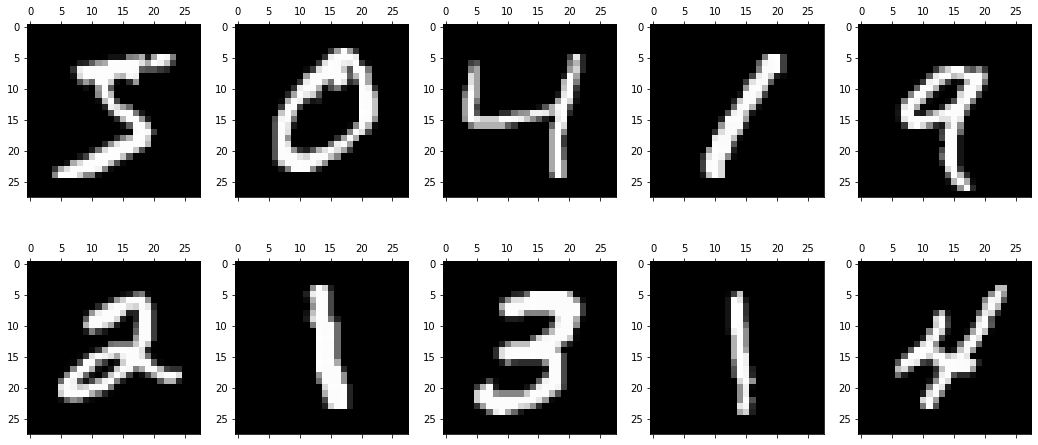

In [0]:
# MNIST 데이터셋을 간략히 살펴보겠습니다.
import matplotlib.pyplot as plt
%matplotlib inline

plt.gray() # 그레이스케일로 만들어줍니다.
figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

 # train set 10개만 보겠습니다.
print(y_train[0:10])

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## Preprocessing

In [0]:
# 전처리 작업으로써 이미지를 벡터화하겠습니다.
# train set의 경우 60,000개 이미지가 각각 28 * 28개의 픽셀로 이루어져있습니다.
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
# reshape 함수를 이용하면 (60000, 28 * 28)를 shape로 갖는 numpy array로 변환할 수 있습니다.
# 이때 각각의 원소는 픽셀의 값으로, 0~255 사이의 값을 가질 것입니다.

# 마찬가지로 test set도 reshape해줍니다.
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

# train은 6만, test는 1만 개가 28 * 28 = 784개씩의 픽셀 정보를 갖습니다.
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [0]:
from keras.utils import to_categorical

# 주어진 데이터는 0~9까지 10개의 라벨을 갖습니다.
# 각 라벨에 해당하는 경우 1, 아니면 0이 되도록 One hot encoding을 해줍니다.

y_train_hot = to_categorical(y_train) # np.eye(10)[y_train]과 동일
y_test_hot = to_categorical(y_test) # np.eye(10)[y_test]와 동일

print(y_train_hot.shape)
print(y_test_hot.shape)

(60000, 10)
(10000, 10)


### Define Sigmoid

In [0]:
# 활성화 함수로써 sigmoid를 정의해줍니다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

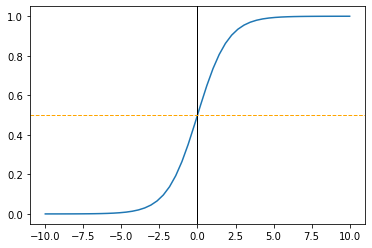

In [0]:
# sigmoid 함수는 다음과 같은 S자형 함수입니다.
xx = np.linspace(-10, 10) # start=-10, stop=10
yy = sigmoid(xx)
plt.plot(xx, yy)

# -1과 1사이의 값을 갖고, y절편은 0.5입니다.
plt.axvline(x=0, color="black", linewidth=1) 
plt.axhline(y=0.5, linestyle='--', color="orange", linewidth=1)
plt.show()

### Define Cross Entropy

In [0]:
# loss function으로써 cross entropy를 정의해줍니다.
def cross_entropy(actual, predict, eps=1e-15):
    
    # 실제 값과 예측 값을 Numpy 배열로 바꿔줍니다.
    actual = np.array(actual)
    predict = np.array(predict)
    
    # 0이 log에 들어가게 되면 무한대로 발산해버릴 수 있으니 아주 작은 값을 넣어 이를 방지합니다.
    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)
    
    # 실질적인 Loss를 계산합니다
    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

## Solving MNIST problem using Single-layer Neural Network

이전 시간에 배운 퍼셉트론 알고리즘을 이용해 MNIST 문제를 해결해봅시다. 여기서는 Multiple-layer과의 차이를 강조하기 위해 Single-layer라고 적었습니다. 앞에서 정의해준 `sigmoid`를 활성화함수로, `cross_entropy`를 손실함수로 갖습니다. 또한 num_epoch과 learning_rate는 각각 100과 1로 정해주었습니다. 이제 정확도가 0.8에 도달할 때까지 모든 epoch에 대해 학습하도록 하겠습니다.

In [0]:
num_epoch = 100
learning_rate = 1.0

# 우리가 학습해야하는 값들을 먼저 정의해줍니다.
W = np.random.uniform(low=-1.0, high=1.0, size=(784, 10))  # (num_input_features, num_labels)
b = np.random.uniform(low=-1.0, high=1.0, size=(1, 10)) # (1, num_labels)

# 샘플 수도 저장해줍니다.
num_data = X_train.shape[0]

# 학습 시작!
for epoch in range(num_epoch):
    # 먼저 합성곱을 해준 다음, 시그모이드 함수에 넣어줍니다.
    y_predict_hot = X_train.dot(W) + b
    y_predict_hot = sigmoid(y_predict_hot)
    
    # 가장 큰 확률값을 갖는 라벨을 예측값으로 만들어줍니다.
    y_predict = np.argmax(y_predict_hot, axis=1)
    accuracy = (y_predict == y_train).mean()   
    
    # 정확도가 0.8에 도달할 때까지 학습합니다.
    if accuracy > 0.8:
        break

    # loss 함수는 cross entropy를 사용하였습니다.
    # 위와 달리 one hot encoding된 y_train_hot을 사용합니다.
    loss = cross_entropy(y_train_hot, y_predict_hot)

    # 일정 시간이 지나면 학습의 경과를 출력합니다.
    if epoch % 10 == 0:
        print("{0:2} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

    # 경사하강법에 따라 비용함수를 최소화하도록 각 값들을 갱신해줍니다   
    W = W - learning_rate * np.dot(X_train.T, (y_predict_hot - y_train_hot)) / num_data
    b = b - learning_rate * (y_predict_hot - y_train_hot).mean(axis=0, keepdims=True) # 행 연산

print("----" * 10)
print("{0:2} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

 0 accuracy = 0.08470, loss = 16.44515
10 accuracy = 0.58188, loss = 1.83945
20 accuracy = 0.74288, loss = 1.83314
30 accuracy = 0.74535, loss = 1.66698
40 accuracy = 0.73915, loss = 1.34617
----------------------------------------
47 accuracy = 0.80243, loss = 1.38109


이때 **b의 shape**에 유의하시길 바랍니다. 이전에는 단순한 벡터의 평균이므로 mean() 함수 안에 axis 옵션을 지정하지 않거나, 한 개의 정답을 내는 문제의 경우 0으로 설정하였습니다. 그런데 MNIST 문제의 경우 라벨이 10개이므로, **행 연산(axis=0)**으로써 라벨 각각에 대해 행들의 평균을 계산해주어야 합니다. 결과적으로 한 개의 라벨에 한 개의 bias값을 학습하도록 하며, b의 shape은 (1, 10)이 되어야 합니다. 이 부분은 [배열의 연산](https://datascienceschool.net/view-notebook/464860bf5a5f4e139b05ccc473f1f15c/)을 복습하시면 좋습니다.

### Evaluate (Train)

In [0]:
# 학습한 w, b를 가지고 실제값과 예측값을 계산해봅시다.
# 먼저 train set에 대해서 결괏값을 만들어줍니다.
y_predict_hot = X_train.dot(W) + b
y_predict_hot = sigmoid(y_predict_hot)
y_predict = np.argmax(y_predict_hot, axis=1)

# actual vs. predict
train_result = pd.DataFrame({'actual': y_train, 'predict': y_predict})

# accuracy는 다음과 같이 계산됩니다.
train_accuracy = (train_result["actual"] == train_result["predict"]).mean(axis=0)
print("Accuracy(train) = {0:.5f}".format(train_accuracy))

print(train_result.shape)
train_result.head(10)

Accuracy(train) = 0.80243
(60000, 2)


,actual,predict
0,5,0
1,0,0
2,4,4
3,1,1
4,9,4
5,2,2
6,1,1
7,3,3
8,1,1
9,4,4


### Evaluate (Test)

In [0]:
# 다음으로 test set에 대해서 결괏값을 만들어줍니다.
y_predict_hot = X_test.dot(W) + b
y_predict_hot = sigmoid(y_predict_hot)
y_predict = np.argmax(y_predict_hot, axis=1)

# actual vs. predict
test_result = pd.DataFrame({'actual': y_test, 'predict': y_predict})

# accuracy는 다음과 같이 계산됩니다.
test_accuracy = (test_result["actual"] == test_result["predict"]).mean(axis=0)

print("Accuracy(test) = {0:.5f}".format(test_accuracy))

print(test_result.shape)
test_result.head(10)

Accuracy(test) = 0.81400
(10000, 2)


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,0
9,9,9


## Solving MNIST problem using Multi-layer Neural Network

다음으로 Multi Layer Perceptron 알고리즘을 사용할 것입니다. 1개의 은닉층(hidden layer), 특히 노드를 100개로 설정함으로써 wide한 인공신경망을 만들어주었습니다. 은닉층이 1개이므로 w와 b를 두 쌍 학습해야 합니다. 이번에는 정확도가 0.9에 도달할 때까지 학습하도록 하겠습니다.

In [0]:
# derivative of sigmoid function
def dsigmoid(A):
    # sigmoid 함수를 미분하면 출력값 * (1-출력값)과 같습니다.
    dA = A * (1 - A)
    return dA

In [0]:
#We'll use the first 40000 training data as training set, and the 20000 as validation set.

X_train_batch = X_train[:40000].reshape(40000, 28 * 28)
y_train_batch = y_train_hot[:40000]

X_train_batch.shape, y_train_batch.shape

((40000, 784), (40000, 10))

In [0]:
X = X_train_batch
y = y_train_batch
y_true = y.argmax(axis = 1)

nn_input = X.shape[1]
nn_output = y.shape[1]
nn_hidden_layer = 100
np.random.seed(10)

W1 = np.random.uniform(-1.0, high = 1.0, size = (nn_input, nn_hidden_layer))
b1 = np.random.uniform(-1.0, high = 1.0, size = (1, nn_hidden_layer))
W2 = np.random.uniform(-1.0, high = 1.0, size = (nn_hidden_layer,nn_output))
b2 = np.random.uniform(-1.0, high = 1.0, size = (1,nn_output))


learning_rate = 0.03
num_epoch = 1000

# 샘플 수도 저장해줍니다.
num_data = X.shape[1]

# 학습 시작!
for epoch in range(num_epoch):
    # 먼저 합성곱을 해준 다음, 시그모이드 함수에 넣어줍니다.
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    y_predict_hot = sigmoid(z2)
    y_predict = np.argmax(y_predict_hot, axis=1)
    accuracy = (np.equal(y_predict, y_true)).mean()
    # 이 단계에서 예측값은 0에서 1 사이 연속된 값을 갖는 확률입니다. 
    # 0 또는 1로 이진분류하기 위해 threshold를 0.5로 해줍니다.
    # 곧 예측한 확률이 50%보다 크다면 y가 1일 것이라고 생각하는 거죠.
    loss = cross_entropy(y, y_predict_hot)

    if epoch % 20 == 0: 
        print("{0:2} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

    # 정확도가 0.9에 도달할 때까지 학습합니다.
    if accuracy >= 0.9:
        break

    # 경사하강법에 따라 비용함수를 최소화하도록 각 값들을 갱신해줍니다

    d1 = y_predict_hot - y
    d2 = d1.dot(W2.T) * (dsigmoid(a1))
    W1 -= learning_rate * X.T.dot(d2) / num_data
    b1 -= learning_rate * d2.mean(axis = 0, keepdims = True)
    W2 -= learning_rate * a1.T.dot(d1) / num_data
    b2 -= learning_rate * d1.mean(axis = 0, keepdims = True)

print("-----"*10)
print("{0:2} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))


 0 accuracy = 0.13905, loss = 2.05755
20 accuracy = 0.70285, loss = 0.16796
40 accuracy = 0.78573, loss = 0.13028
60 accuracy = 0.82205, loss = 0.11239
80 accuracy = 0.84283, loss = 0.10066
100 accuracy = 0.85790, loss = 0.09279
120 accuracy = 0.86787, loss = 0.08674
140 accuracy = 0.87450, loss = 0.08250
160 accuracy = 0.88260, loss = 0.07813
180 accuracy = 0.88707, loss = 0.07519
200 accuracy = 0.89102, loss = 0.07230
220 accuracy = 0.89558, loss = 0.07006
240 accuracy = 0.89870, loss = 0.06823
--------------------------------------------------
246 accuracy = 0.90007, loss = 0.06752


### Validate
Validate with the rest of training data.

In [0]:
# 학습한 w, b를 가지고 실제값과 예측값을 계산해봅시다.
# 먼저 train set에 대해서 결괏값을 만들어줍니다.
z1 = X_train[40000:].dot(W1) + b1
a1 = sigmoid(z1)
z2 = a1.dot(W2) + b2
y_predict_hot = sigmoid(z2)
y_predict = np.argmax(y_predict_hot, axis=1)
accuracy = (np.equal(y_predict, y_train[40000:])).mean()

# actual vs. predict
validation_result = pd.DataFrame({'actual': y_train[40000:], 'predict': y_predict})

# accuracy는 다음과 같이 계산됩니다.
validation_accuracy = (validation_result["actual"] == validation_result["predict"]).mean()
print("Accuracy(validation) = {0:.5f}".format(validation_accuracy))

print(train_result.shape)
train_result.head(10)

Accuracy(validation) = 0.88010
(60000, 2)


,actual,predict
0,5,0
1,0,0
2,4,4
3,1,1
4,9,4
5,2,2
6,1,1
7,3,3
8,1,1
9,4,4


This shows that validation accuracy is 88%, which is 2% lower than the training accuracy. Only adjustable hyper parameters are epoch, learning rate, and the stopping accuracy in this case, so we may try changing the stopping accuracy and learning rate to see if we could achieve models with higher accuracies. Let's leave it here for now and implement other improving techniques in the next notebook.


Before we go, let's get the test accuracy. I assume it will be similar to validation accuracy.

### Evaluate (Test)

In [0]:
# 다음으로 test set에 대해서 결괏값을 만들어줍니다.
z1 = X_test.dot(W1) + b1
a1 = sigmoid(z1)
z2 = a1.dot(W2) + b2
y_predict_hot = sigmoid(z2)
y_predict = np.argmax(y_predict_hot, axis=1)
accuracy = (np.equal(y_predict, y_test)).mean()

# actual vs. predict
test_result = pd.DataFrame({'actual': y_test, 'predict': y_predict})

# accuracy는 다음과 같이 계산됩니다.
test_accuracy = (test_result["actual"] == test_result["predict"]).mean()
print("Accuracy(test) = {0:.5f}".format(test_accuracy))

print(test_result.shape)
test_result.head(10)

Accuracy(test) = 0.88520
(10000, 2)


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,0
9,9,9


As expected, we got test accuracy of 88.5% which is only 0.5% off from validation accuracy. If these two sets are uniformly distributed, accuracies for them should be similar since we didn't change anything in the model.

Next notebook, I'll apply mini batch gradient descent, a technique that improves model training speed and reduces the chance of converging into local minimum.